![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Here, **c** is the number of classes and **pi** is the probability associated with the ith class. 

The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in **entropy measure** of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.

## **5.2 Gini index** <a class="anchor" id="5.2"></a>

[Table of Contents](#0.1)


Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points. 


Gini index can be represented with the following diagram:-

## **Gini index**

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

1.	Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

2.	Calculate Gini for split using weighted Gini score of each node of that split.


In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [7]:
import pandas as pd
df = pd.read_csv("data.csv")


In [8]:
df[df.columns[-1]].unique()

array(['no', 'yes'], dtype=object)

In [10]:
with open('yarebi', 'w+') as f:
        f.truncate(0)
with open('results.txt', 'w+') as f:
    f.truncate(0)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
# import category encoders
import category_encoders as ce
#===============================================ENCODER=====================================================
def encoder(df): # cette fonction encode notre dataset et renvoie X_train,X_test,y_train,y_test
    X = df.drop([df.columns[-1]], axis=1)
    y = df[df.columns[-1]]
    # split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
    # encode variables with ordinal encoding
    col=[]
    for i in range(len(df.columns)-1):
        col.append(df.columns[i])
    encoder = ce.OrdinalEncoder(cols=col)
    x_train = encoder.fit_transform(X_train)
    x_test = encoder.transform(X_test)
    return x_train,x_test,y_train,y_test,X_train
#===============================================ENTRAINER=====================================================
def entrainer(x_train,y_train,index):
    # Entrainement du modele
    model= DecisionTreeClassifier(criterion=index, max_depth=3, random_state=0)
    model.fit(x_train, y_train)
    return model

#===============================================PLOT=====================================================
def plot_tree(df,model):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,3), dpi=200)
    tree.plot_tree(model,
                feature_names = df.columns[0:-1], 
                class_names=df[df.columns[-1]].unique(),
                filled = True)

In [10]:
x_train,x_test,y_train,y_test,X_train=encoder(df)

In [11]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train,y_train)



GaussianNB()

In [ ]:
#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

In [6]:
from collections import defaultdict

for i in range(x_train.shape[1]):
    val_not_enoded=X_train[X_train.columns[i]].unique()
    val_encoded=np.sort(x_test[x_test.columns[i]].unique())
    my_dict = {val_not_enoded[j] : val_encoded[j] for j in range(len(val_not_enoded))} 
    print(x_train.columns[i])
    print(my_dict)


outlook
{'sunny': 1, 'overcast': 2, 'rainy': 3}
temperature
{'cool': 1, 'hot': 2, 'mild': 3}
humidity
{'normal': 1, 'high': 2}
windy
{False: 1, True: 2}


In [1]:
import pandas as pd

In [4]:
dff=pd.read_csv(r"C:\Users\HP\Downloads\titanic.csv")
dff

,class,age,sex,survived
0,1st,adult,male,yes
1,1st,adult,male,yes
2,1st,adult,male,yes
3,1st,adult,male,yes
4,1st,adult,male,yes
...,...,...,...,...
2196,crew,adult,female,yes
2197,crew,adult,female,yes
2198,crew,adult,female,no
2199,crew,adult,female,no


In [5]:
import chefboost as chef
config = {'algorithm':'ID3'}
model=chef.fit(dff, config = config, target_label = dff.columns[-1])

AttributeError: module 'chefboost' has no attribute 'fit'

In [56]:
l=[]
a=[]
for i in range(x_train.shape[1]):
    val_not_enoded=X_train[X_train.columns[i]].unique()
    val_encoded=np.sort(x_test[x_test.columns[i]].unique())
    for j in range(len(val_not_enoded)):
        l.append([val_not_enoded[j],val_encoded[j]])
params=['sunny','cool','high',False]
for i in range(len(params)):
    for j in range(len(l)):
        if params[i] in l[j]:
            a.append(l[j][1])
            break
a

[1, 1, 2, 1]

In [43]:
my_dict = {str(X_train[X_train.columns[i]].unique()) : np.sort(x_test[x_test.columns[i]].unique()) for i in range(x_train.shape[1])} 
my_dict


{"['sunny' 'overcast' 'rainy']": array([1, 2, 3]),
 "['cool' 'hot' 'mild']": array([1, 2, 3]),
 "['normal' 'high']": array([1, 2]),
 '[False  True]': array([1, 2])}

In [51]:
my_dict.keys('['sunny' 'overcast' 'rainy']')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4132040980.py, line 1)

In [7]:
model=entrainer(x_train,y_train,index='gini')
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.6000


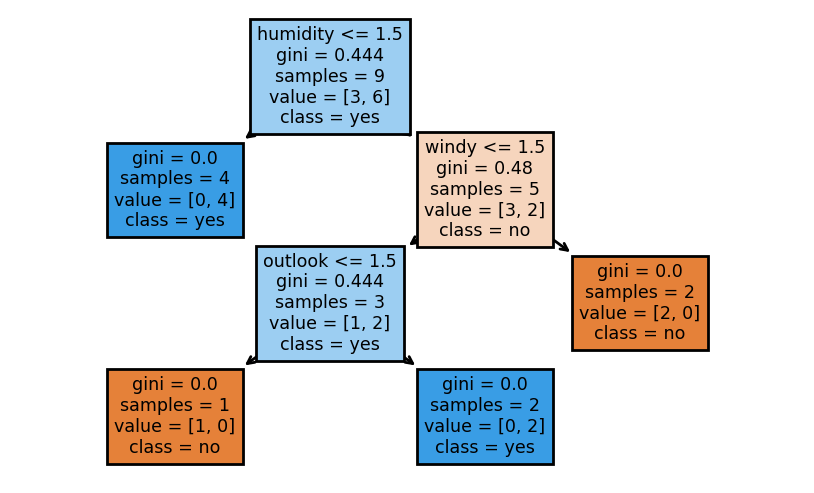

In [8]:
plot_tree(df,model)

We now have training and test set ready for model building. 

### **13. Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>



In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Entrainement du modele
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.6000


### Predict the Test set results with criterion gini index

In [13]:
l=[]
a=[]
for i in range(x_train.shape[1]):
    val_not_enoded=X_train[X_train.columns[i]].unique()
    val_encoded=np.sort(x_train[x_train.columns[i]].unique())
    for j in range(len(val_not_enoded)):
        if val_not_enoded[j]==str:
            l.append([val_not_enoded[j],val_encoded[j]])
        else:
            l.append([str(val_not_enoded[j]),val_encoded[j]])
params=['rainy','cool','high',str(True)]
for i in range(len(params)):
    for j in range(len(l)):
        if params[i] in l[j]:
            print(params[i],l[j])
            a.append(l[j][1])
            break
print(l)
a

rainy ['rainy', 3]
cool ['cool', 1]
high ['high', 2]
True ['True', 2]
[['sunny', 1], ['overcast', 2], ['rainy', 3], ['cool', 1], ['hot', 2], ['mild', 3], ['normal', 1], ['high', 2], ['False', 1], ['True', 2]]


[3, 1, 2, 2]

In [15]:
l=[1,1,2,1]
data_ = {df.columns[j] : [a[j]] for j in range(len(a))} 
# Create DataFrame  
data_= pd.DataFrame(data_)  
data_

,outlook,temperature,humidity,windy
0,3,1,2,2


In [16]:
y_pred_gini = model.predict(data_)
print(y_pred_gini)


['no']


### Check accuracy score with criterion gini index

In [83]:
from sklearn.metrics import accuracy_score

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))


Training set score: 1.0000
Test set score: 0.6000


### Visualize decision-trees

[Text(0.4, 0.875, 'X[2] <= 1.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.625, 'X[3] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.375, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

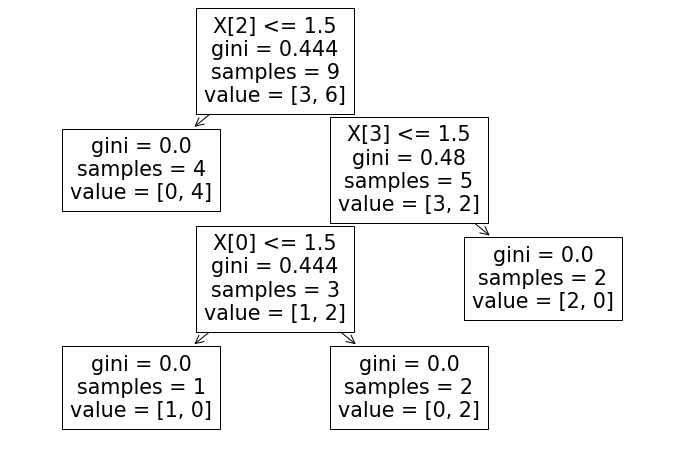

In [57]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

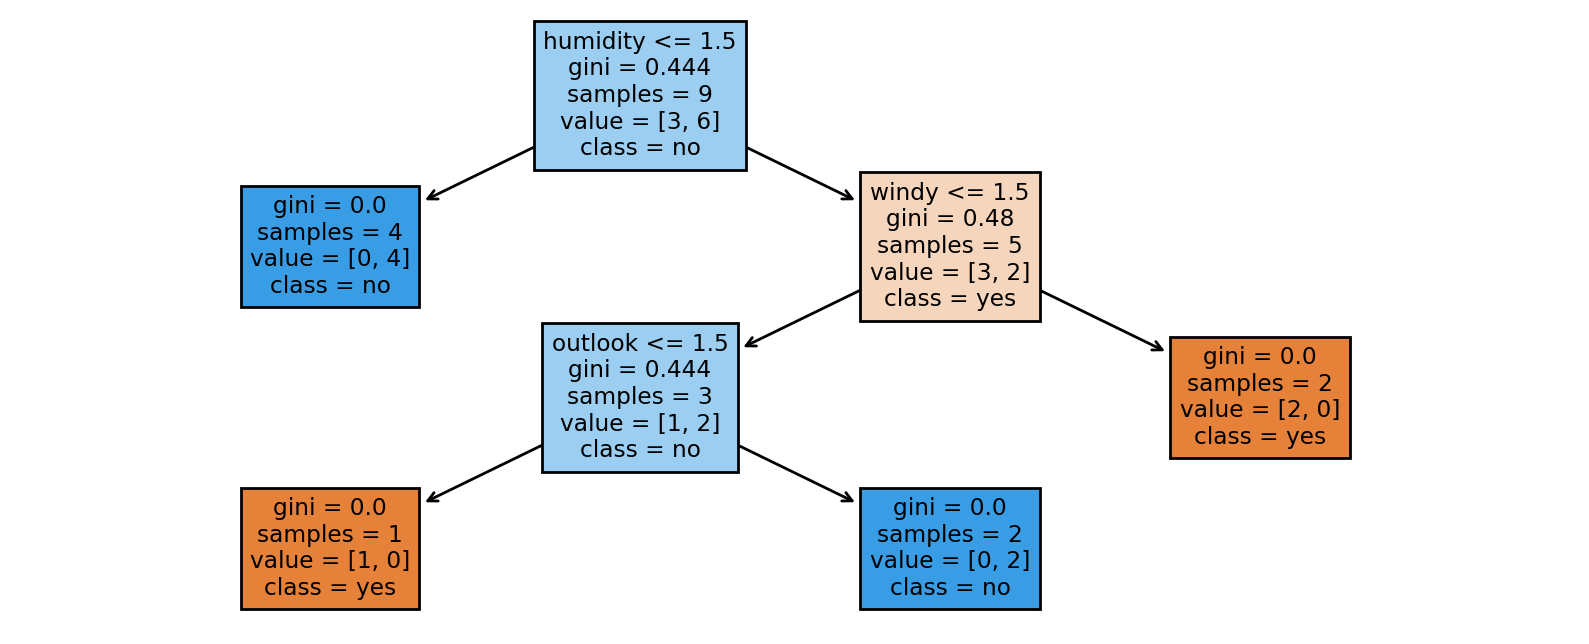

In [80]:
fn=col
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=200)
tree.plot_tree(clf_gini,
               feature_names = fn, 
               class_names=['yes','no'],
               filled = True)
fig.savefig('imagename.png')

### **14. Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>



In [84]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [85]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [86]:

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6000


### Compare the train-set and test-set accuracy

In [88]:

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.6000


### Visualize decision-trees

[Text(0.4, 0.875, 'X[2] <= 1.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.625, 'X[3] <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.375, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

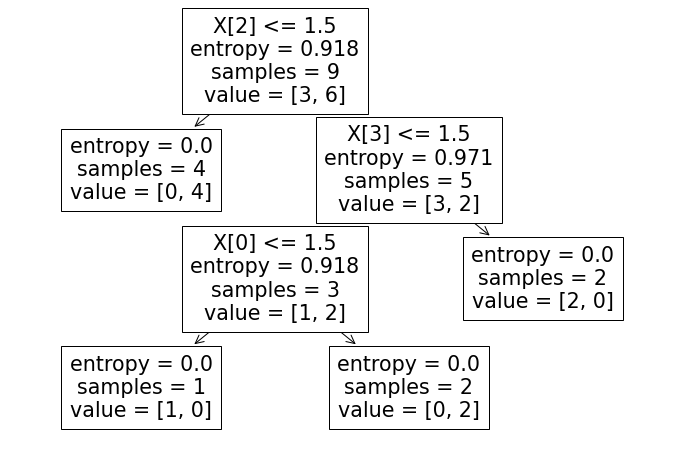

In [89]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

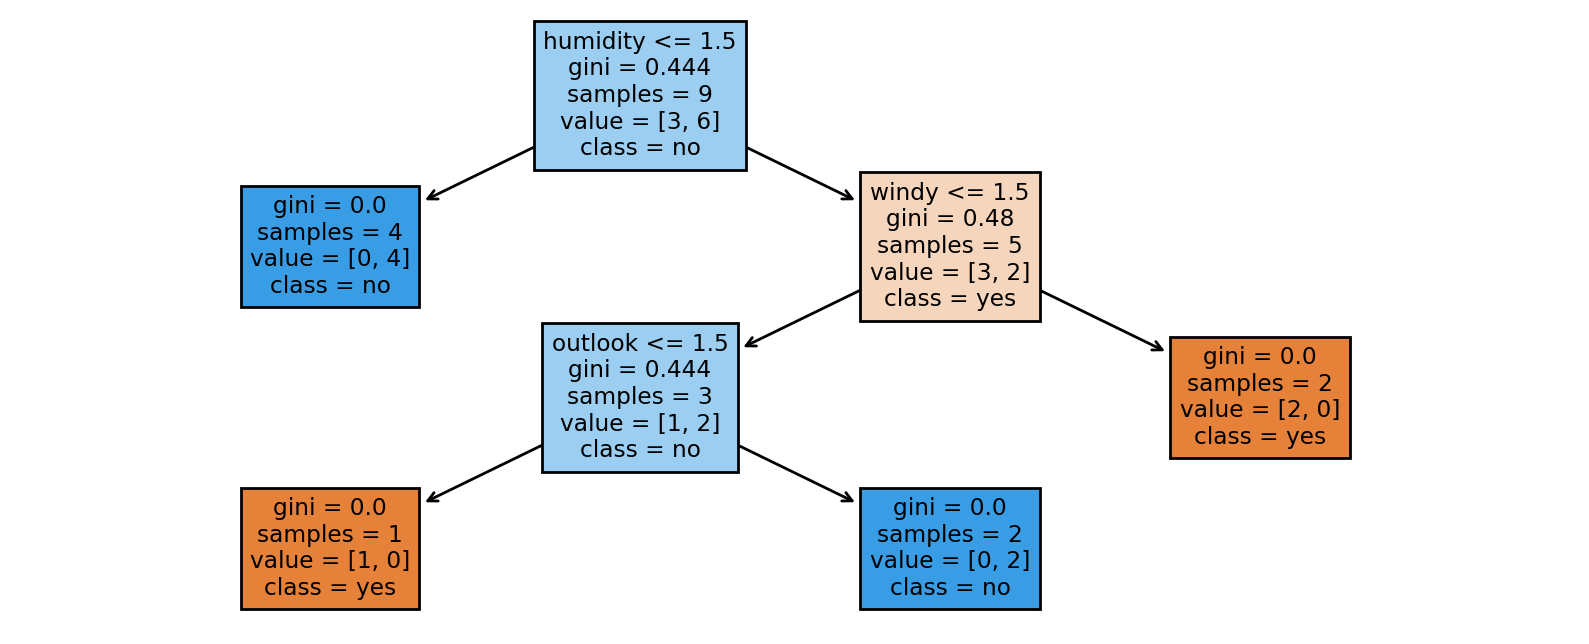

In [90]:
fn=col
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=200)
tree.plot_tree(clf_gini,
               feature_names = fn, 
               class_names=['yes','no'],
               filled = True)
fig.savefig('imagename.png')

In [91]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[1 1]
 [1 2]]
